In [ ]:
# Date created: March 16, 2025
# Date last modifeid: March 16, 2025

In [8]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# define the url for data
url = "data/data.csv"

In [12]:
# Load the CSV file
# By default, Pandas loads large files in chunks, sometimes leading to mixed-type warnings.
# You can disable chunking:
df = pd.read_csv(url, encoding="ISO-8859-1", low_memory=False)

# Display the first few rows
display(df)  # Use display() in Jupyter to show tables nicely

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
"""
Title: "Data Visualization with Air Quality Data"
Dataset: Air Quality in India
url: https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data?resource=download
This project is intended to explore India's air pollution levels over the years using the provided dataset. The dataset represents a combined and cleaned version of the Historical Daily Ambient Air Quality Data.

Problem Statement:
The primary goal of this project is to analyze India's air pollution data and derive meaningful insights. Identify local trends in air quality, examine the correlation between air quality changes and shifts in environmental policies in India, and explore factors influencing air pollution levels.

Inspiration:
- Can we detect local trends?
- Can we relate the air quality changes to changes in Environmental policy in India?

Tasks:
    •	Dataset Exploration:
        o	Explore the dataset to understand its structure and features.
        o	Identify key pollutants and their variations over the years.

    •	Temporal Analysis:
        o	Analyze air quality trends over the years.
        o	Identify any seasonal patterns or significant changes.

    •	Regional Trends:
        o	Investigate regional variations in air quality.
        o	Explore differences in pollution levels between states and cities.
        o	Create visualizations to illustrate trends, patterns, and regional variations in air quality.

    •	Predictive Modeling:
        o	If feasible, consider building predictive models for air quality based on historical data.
        o	Evaluate model performance and explore its potential application.
"""

'\nTitle: "Data Visualization with Air Quality Data"\nDataset: Air Quality in India\nurl: https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data?resource=download\nThis project is intended to explore India\'s air pollution levels over the years using the provided dataset. The dataset represents a combined and cleaned version of the Historical Daily Ambient Air Quality Data.\n\nProblem Statement:\nThe primary goal of this project is to analyze India\'s air pollution data and derive meaningful insights. Identify local trends in air quality, examine the correlation between air quality changes and shifts in environmental policies in India, and explore factors influencing air pollution levels.\n\nTasks:\n    •\tDataset Exploration:\n        o\tExplore the dataset to understand its structure and features.\n        o\tIdentify key pollutants and their variations over the years.\n\n    •\tTemporal Analysis:\n        o\tAnalyze air quality trends over the years.\n        o\tIde

In [ ]:
"""
Task 1: Dataset Exploration
        o	Explore the dataset to understand its structure and features.
        o	Identify key pollutants and their variations over the years.
"""

In [14]:
# Display the dataset's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [17]:
# Display the summary statistics of the dataset
df.describe(include="all")

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
count,291665,435739,435742,435739,286261,430349,401096.000000,419509.000000,395520.000000,198355.000000,408251,9314.000000,435735
unique,745,5485,37,304,64,10,NaN,NaN,NaN,NaN,991,NaN,5067
top,193,19-03-15,Maharashtra,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",NaN,NaN,NaN,NaN,Regional Office,NaN,2015-03-19
freq,1428,253,60384,9984,27857,179014,NaN,NaN,NaN,NaN,6261,NaN,253
mean,NaN,NaN,NaN,NaN,NaN,NaN,10.829414,25.809623,108.832784,220.783480,NaN,40.791467,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.177187,18.503086,74.872430,151.395457,NaN,30.832525,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,14.000000,56.000000,111.000000,NaN,24.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,22.000000,90.000000,187.000000,NaN,32.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,13.700000,32.200000,142.000000,296.000000,NaN,46.000000,NaN


In [ ]:
# according to the Kaggle dataset description, the columns represent the following:
# stn_code: Station Code
# sampling_date: Date of sampling (note: not unique for each row)
# state: State
# location: Location of the monitoring
# agency: Agency
# type: Type of area (rural, industrial, residential, etc.)
# so2: Sulphur dioxide (µg/m³)
# no2: Nitrogen dioxide (µg/m³)
# rspm: Respirable Suspended Particulate Matter (µg/m³)
# spm: Suspended Particulate Matter (µg/m³)
# location_monitoring_station: Location of the monitoring station
# pm2_5: Particulate Matter 2.5 (µg/m³)
# date: Date of sampling

In [16]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [18]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

stn_code                       144077
sampling_date                       3
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64


In [19]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 674


In [20]:
# Displays the feature names (column headers).
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [21]:
# Check Unique Values for Categorical Columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column '{col}' has {df[col].nunique()} unique values.")

Column 'stn_code' has 745 unique values.
Column 'sampling_date' has 5485 unique values.
Column 'state' has 37 unique values.
Column 'location' has 304 unique values.
Column 'agency' has 64 unique values.
Column 'type' has 10 unique values.
Column 'location_monitoring_station' has 991 unique values.
Column 'date' has 5067 unique values.


array([[<Axes: title={'center': 'so2'}>, <Axes: title={'center': 'no2'}>],
       [<Axes: title={'center': 'rspm'}>,
        <Axes: title={'center': 'spm'}>],
       [<Axes: title={'center': 'pm2_5'}>, <Axes: >]], dtype=object)

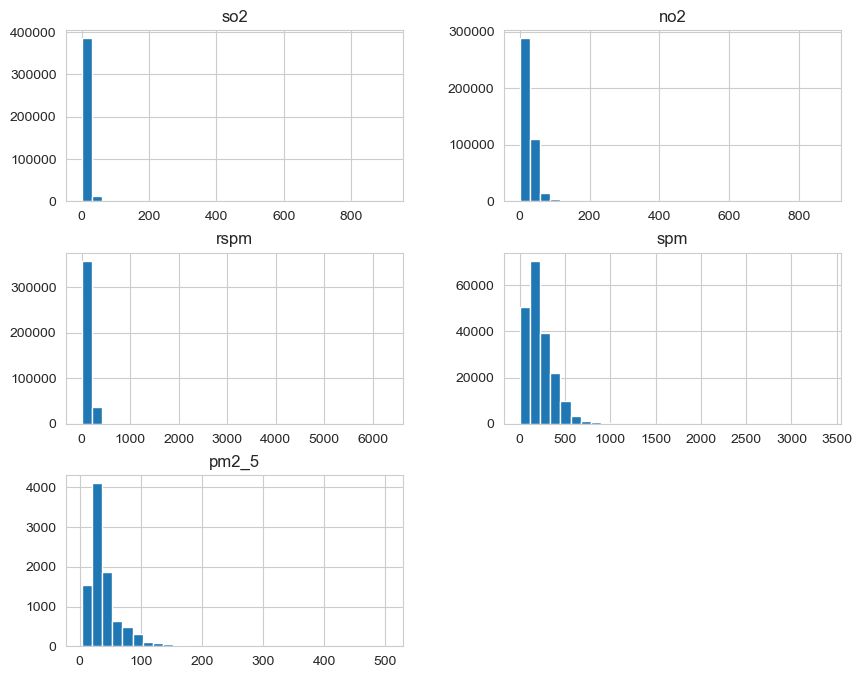

In [22]:
# Check Data Distribution
# Gives a quick visualization of numerical data distribution.
df.hist(figsize=(10, 8), bins=30)


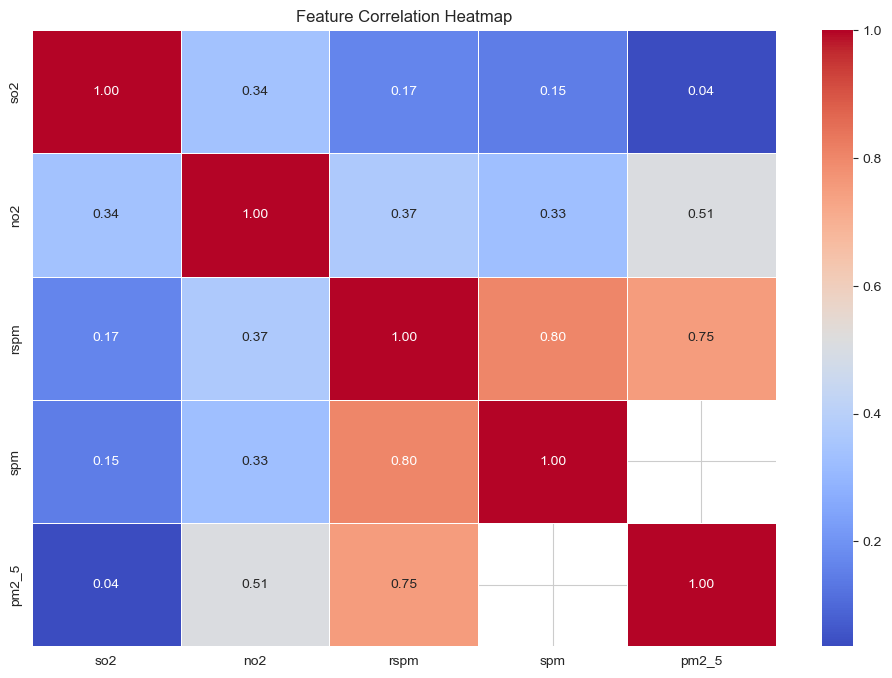

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
# Task 1-2: Identify key pollutants and their variations over the years.
# Identify key pollutants
# pollutants: a substance that pollutes something, especially water or the atmosphere.
# "chemical pollutants"
pollutants = ["so2", "no2", "rspm", "spm", "pm2_5"]

# so2: Sulphur dioxide (µg/m³)
# no2: Nitrogen dioxide (µg/m³)
# rspm: Respirable Suspended Particulate Matter (µg/m³)
# spm: Suspended Particulate Matter (µg/m³)
# pm2_5: Particulate Matter 2.5 (µg/m³)

In [28]:
df[pollutants].describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [31]:
# Convert the date column to datetime format
df['date_year'] = pd.to_datetime(df['date']).dt.year

In [32]:
# Aggregate pollutant levels by year
pollution_trends = df.groupby('date_year')[pollutants].mean()

In [40]:
# Show the trend table
display(pollution_trends)

,so2,no2,rspm,spm,pm2_5
date_year,,,,,
1987.0,21.827070,30.584545,NaN,280.493947,NaN
1988.0,22.098102,30.606439,NaN,248.841845,NaN
1989.0,18.668066,29.215816,NaN,237.764706,NaN
1990.0,17.723147,25.714482,NaN,243.547009,NaN
1991.0,17.607667,25.986805,NaN,242.843709,NaN
1992.0,17.719765,30.702058,NaN,198.038995,NaN
1993.0,21.958892,30.227629,NaN,272.824324,NaN
1994.0,22.478851,31.764829,NaN,246.946165,NaN
1995.0,26.000877,33.078066,NaN,245.530048,NaN


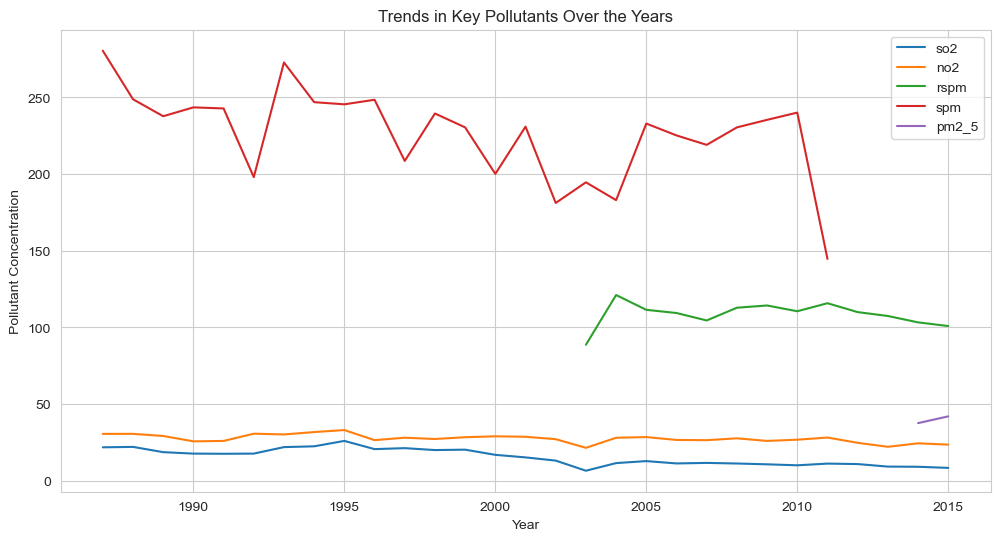

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for pollutant in pollution_trends.columns:
    plt.plot(pollution_trends.index, pollution_trends[pollutant], label=pollutant)

plt.xlabel("Year")
plt.ylabel("Pollutant Concentration")
plt.title("Trends in Key Pollutants Over the Years")
plt.legend()
plt.show()

In [43]:
pollution_trends.describe()

,so2,no2,rspm,spm,pm2_5
count,29.000000,29.000000,13.000000,26.000000,2.000000
mean,15.465929,27.507297,108.511704,219.930805,39.806596
std,5.325589,2.698664,8.039305,44.489406,3.119940
min,6.557118,21.499148,88.706643,56.085870,37.600465
25%,11.201340,25.991634,104.559196,202.265299,38.703531
50%,15.250711,27.688674,110.010378,231.985426,39.806596
75%,20.288986,29.006001,112.879093,243.371184,40.909661
max,26.000877,33.078066,121.152107,280.493947,42.012726
